In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sklearn.preprocessing
from sklearn import metrics
from math import sqrt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")
import acquire
import prepare

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = acquire.acquire_military()

In [3]:
df = prepare.prep_military(df)

In [4]:
df

,country,country_code,active_personnel,air_carriers,armored_vehicles,arty,attack_aircraft,avail_manpower,corvettes,defense_budget,...,square_land_area,subs,tanker_fleet,tanks,total_pop,trainers,transports,total_air_strength,total_sea_strength,total_land_strength
132,United States,USA,1390000,20,45193,2837,1693,147399295,22,770000000000,...,9826675,68,627,6612,334998398,2661,982,25447,220,56008
26,China,CHN,2000000,3,35000,5854,652,754864769,70,250240000000,...,9596961,79,3,5250,1397897720,399,286,5651,430,49264
103,Russia,RUS,850000,1,30122,14145,1283,69737187,86,154000000000,...,17098242,70,20,12420,142320790,522,445,8118,291,60078
131,United Kingdom,UKD,194000,2,5015,215,47,30857260,0,68000000000,...,243610,10,9,227,67081000,247,40,1291,67,5501
44,Germany,GER,184000,0,9217,121,130,36755601,5,50300000000,...,357022,6,0,266,79903481,37,43,1155,35,9642
50,India,IND,1450000,1,12000,3411,167,629485342,22,49600000000,...,3287263,17,6,4614,1339330514,353,253,3837,191,21363
58,Japan,JPN,240000,4,5500,694,142,53615536,6,47482740000,...,377915,21,7,1004,124687293,425,59,2800,99,7297
112,South Korea,SKO,555000,2,13990,6894,202,25857581,11,46320000000,...,99720,22,4,2624,51715162,289,41,2900,189,24082
104,Saudi Arabia,SAR,225000,0,6202,2523,115,18087554,4,46000000000,...,2149690,0,22,1062,34783757,190,49,1545,53,10062
6,Australia,AUS,59000,2,1765,54,59,10840189,0,44618000000,...,7741220,6,6,59,25809973,113,38,810,35,1878


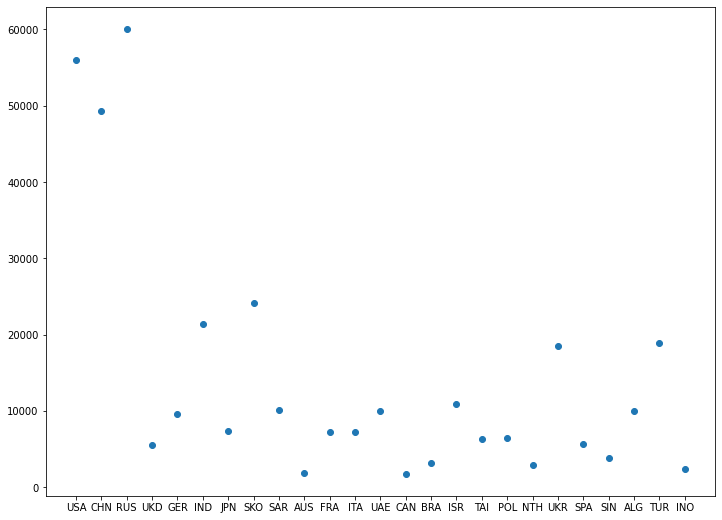

In [5]:
plt.figure(figsize = (12,9))
plt.scatter(df.iloc[:,1], df.iloc[:,36])

In [6]:
df = prepare.split_military(df)

Train: 14 rows, 37 cols
Validate: 6 rows, 37 cols
Test: 5 rows, 37 cols


In [7]:
train, validate, test = df

In [8]:
train.shape

(14, 37)

In [9]:
train.head(25).T

,22,26,104,98,58,17,132,114,44,112,130,103,56,41
country,Canada,China,Saudi Arabia,Poland,Japan,Brazil,United States,Spain,Germany,South Korea,United Arab Emirates,Russia,Italy,France
country_code,CAN,CHN,SAR,POL,JPN,BRA,USA,SPA,GER,SKO,UAE,RUS,ITA,FRA
active_personnel,70000,2000000,225000,120000,240000,360000,1390000,120000,184000,555000,65000,850000,170000,205000
air_carriers,0,3,0,0,4,1,20,1,0,2,0,1,2,4
armored_vehicles,1534,35000,6202,4786,5500,1958,45193,5033,9217,13990,9255,30122,6908,6558
arty,163,5854,2523,609,694,682,2837,236,121,6894,259,14145,162,214
attack_aircraft,0,652,115,30,142,89,1693,35,130,202,50,1283,154,69
avail_manpower,16315589,754864769,18087554,18711097,53615536,108857163,147399295,21739869,36755601,25857581,5716835,69737187,28075664,29957055
corvettes,0,70,4,2,6,2,22,0,5,11,9,86,0,0
defense_budget,23550574382,250240000000,46000000000,14500000000,47482740000,18785000000,770000000000,11750000000,50300000000,46320000000,25266000000,154000000000,29198401050,40900000000


In [10]:
numcols = [col for col in train.columns if train[col].dtype !='O']
numcols

['active_personnel',
 'air_carriers',
 'armored_vehicles',
 'arty',
 'attack_aircraft',
 'avail_manpower',
 'corvettes',
 'defense_budget',
 'destroyers',
 'external_debt',
 'fighters_interceptors',
 'frigates',
 'helos',
 'merch_marine_fleet',
 'mine_warfare',
 'navy_ships',
 'oil_consumption',
 'oil_production',
 'oil_reser',
 'paramilitary',
 'patrol_vess',
 'purchasing_power',
 'res_personnel',
 'rocket_proj',
 'special_mission',
 'square_land_area',
 'subs',
 'tanker_fleet',
 'tanks',
 'total_pop',
 'trainers',
 'transports',
 'total_air_strength',
 'total_sea_strength',
 'total_land_strength']

<AxesSubplot:xlabel='total_air_strength', ylabel='Density'>

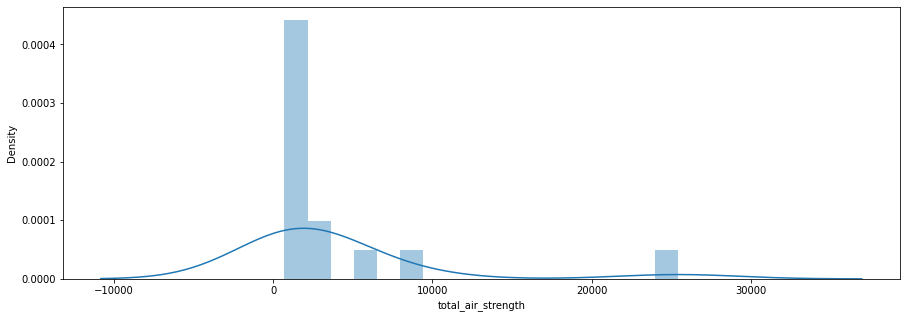

In [11]:
plt.figure(figsize=(15,5))
sns.distplot(train.total_air_strength)

<AxesSubplot:xlabel='total_sea_strength', ylabel='Density'>

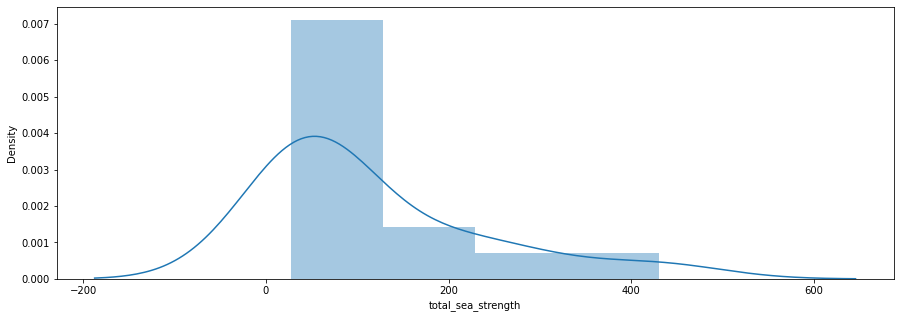

In [12]:
plt.figure(figsize=(15,5))
sns.distplot(train.total_sea_strength)

<AxesSubplot:xlabel='total_land_strength', ylabel='Density'>

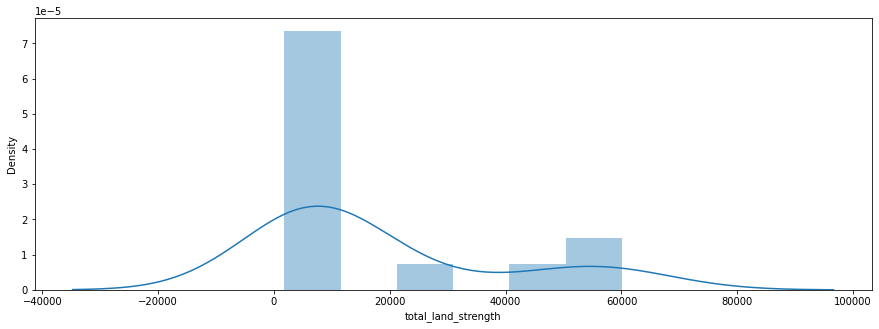

In [13]:
plt.figure(figsize=(15,5))
sns.distplot(train.total_land_strength)

active_personnel


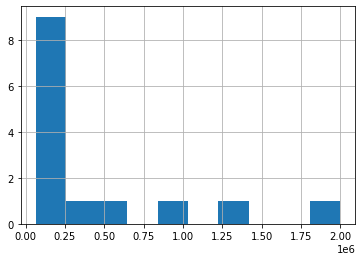

air_carriers


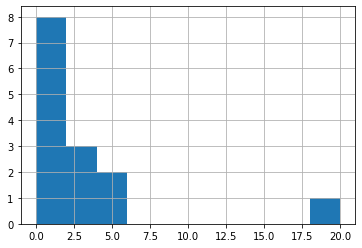

armored_vehicles


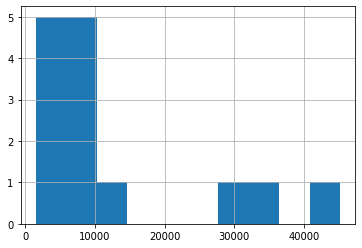

arty


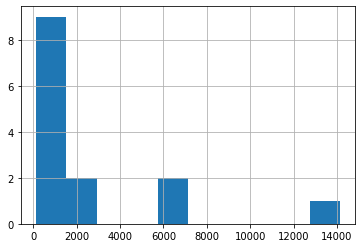

attack_aircraft


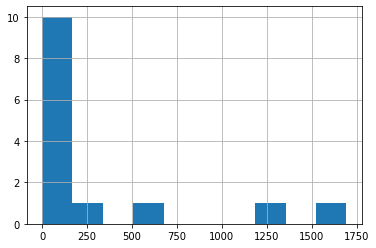

avail_manpower


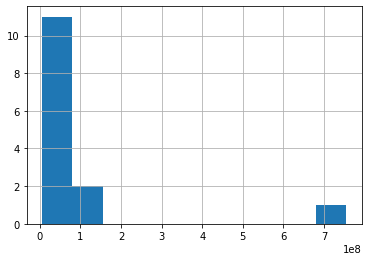

corvettes


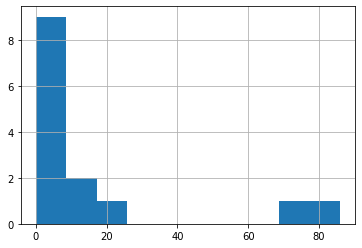

defense_budget


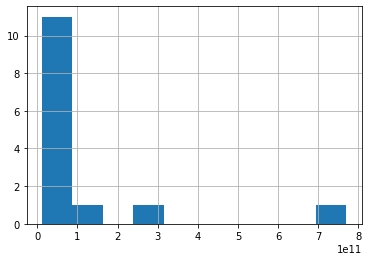

destroyers


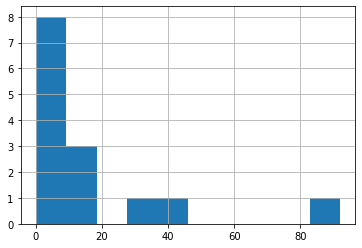

external_debt


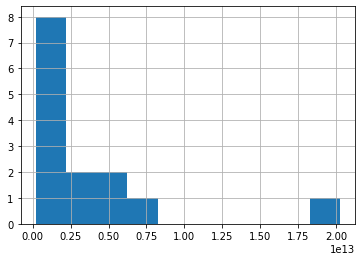

fighters_interceptors


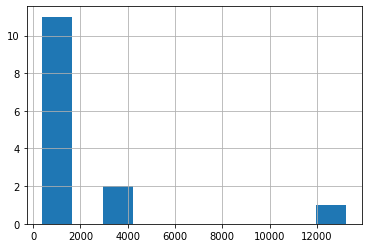

frigates


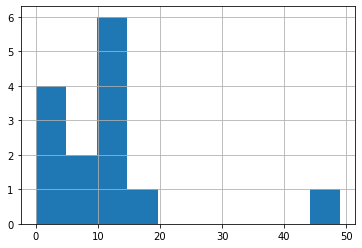

helos


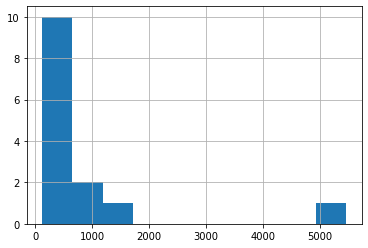

merch_marine_fleet


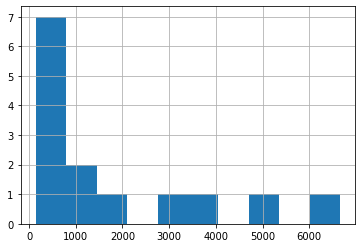

mine_warfare


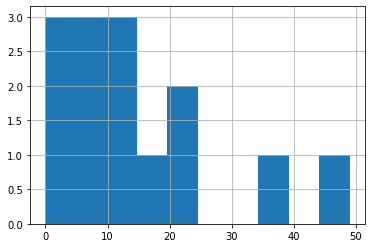

navy_ships


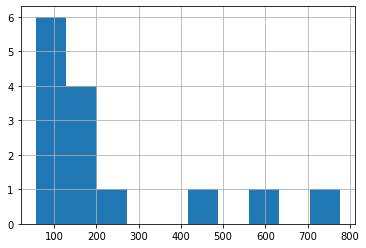

oil_consumption


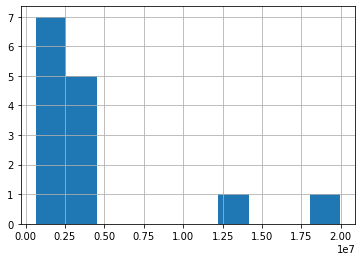

oil_production


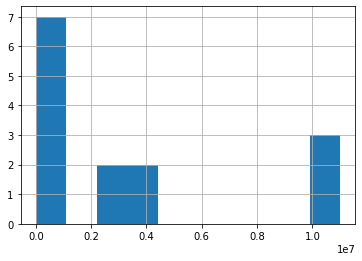

oil_reser


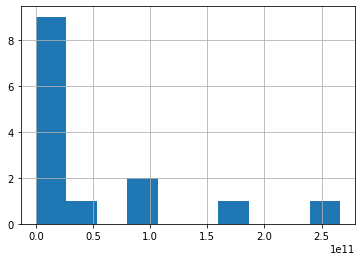

paramilitary


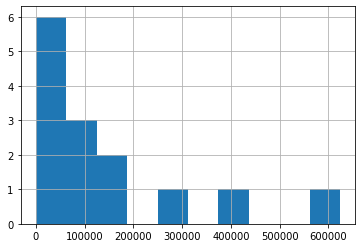

patrol_vess


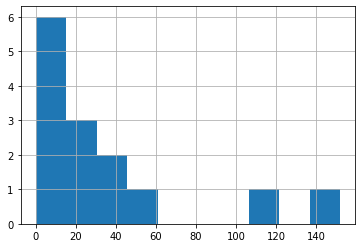

purchasing_power


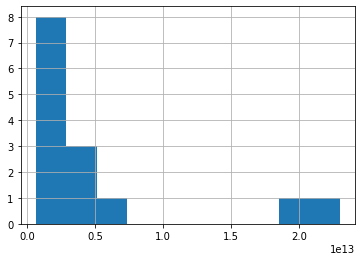

res_personnel


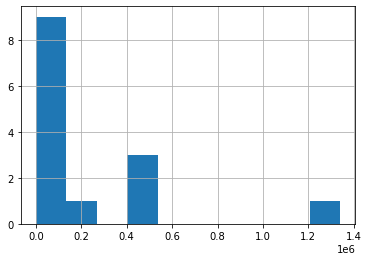

rocket_proj


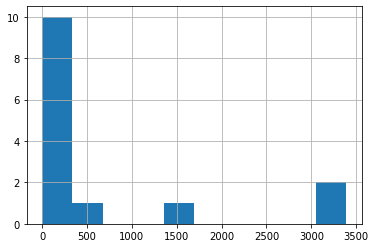

special_mission


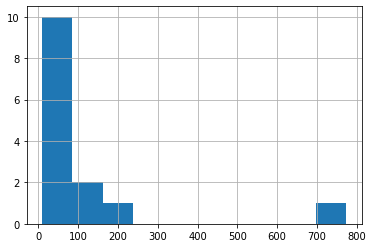

square_land_area


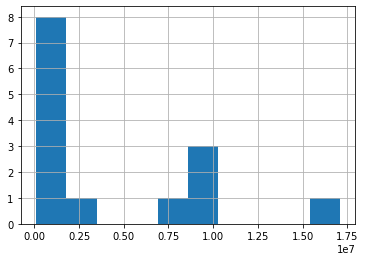

subs


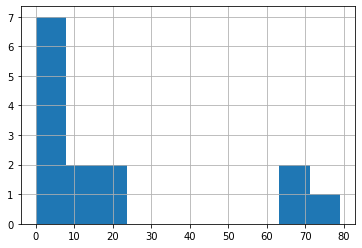

tanker_fleet


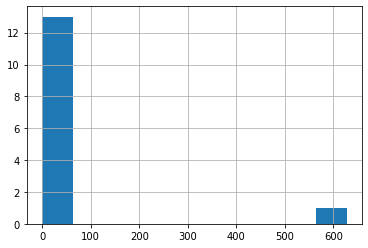

tanks


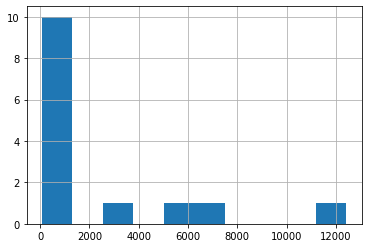

total_pop


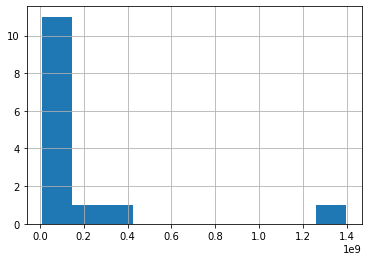

trainers


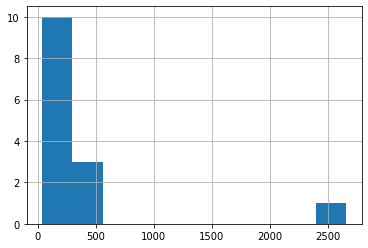

transports


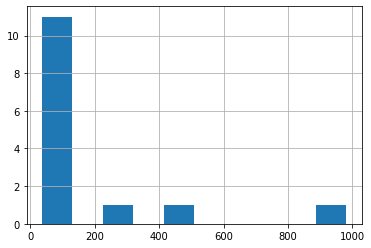

total_air_strength


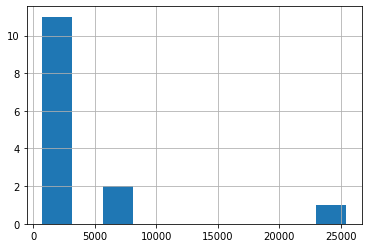

total_sea_strength


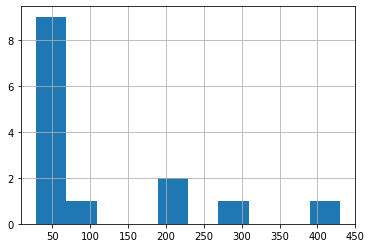

total_land_strength


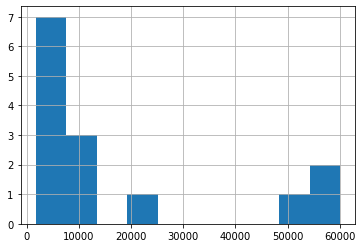

In [14]:
#histograms of numeric columns
for col in numcols:
    print(col)
    train[col].hist()
    plt.show()

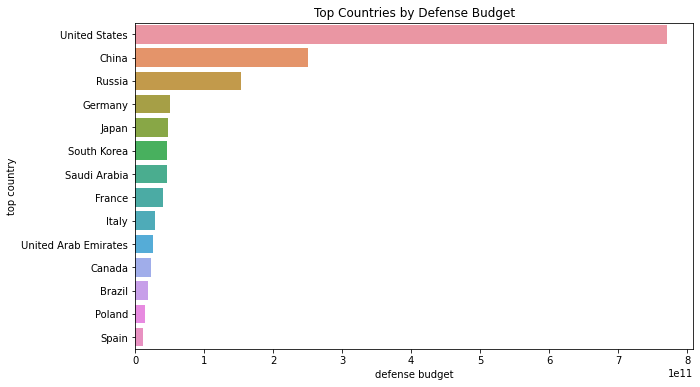

In [15]:
plt.figure(figsize=(10,6))
# make barplot and sort bars
sns.barplot(x='defense_budget', y="country", data=train.sort_values('defense_budget', ascending=False))
# set labels
plt.xlabel("defense budget")
plt.ylabel("top country")
plt.title("Top Countries by Defense Budget")
plt.show()

<AxesSubplot:xlabel='defense_budget', ylabel='country'>

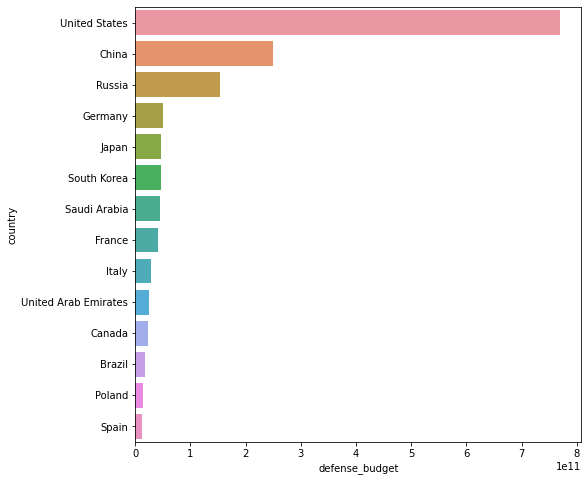

In [16]:
# same bar chart as above less code
plt.figure(figsize = (8,8))
sns.barplot(y='country', x='defense_budget',data=train.sort_values('defense_budget', ascending=False))

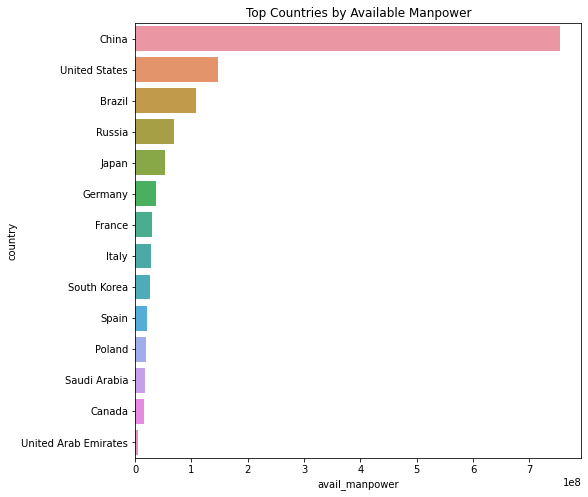

In [17]:
# same bar chart as above less code
plt.figure(figsize = (8,8))
sns.barplot(y='country', x='avail_manpower',data=train.sort_values('avail_manpower', ascending=False))
# set labels
plt.title("Top Countries by Available Manpower")
plt.show()

Text(0.5, 1.0, '"Is there a difference in defense_budget by country?"')

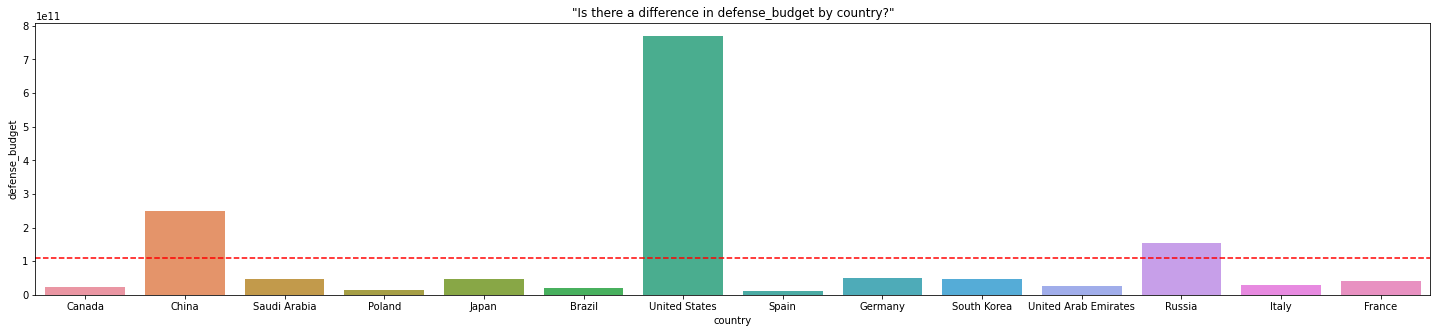

In [18]:
p = plt.figure(figsize=(25,5))
p = sns.barplot(train.country, train.defense_budget)
lmean = train.defense_budget.mean()
p = plt.axhline(lmean, ls='--', color='red')
plt.title('"Is there a difference in defense_budget by country?"')

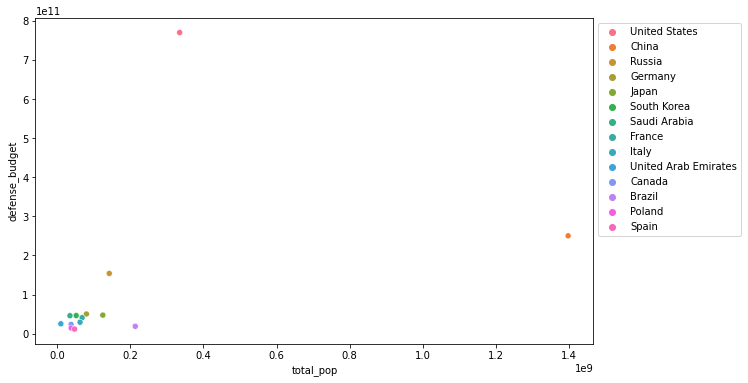

In [19]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='total_pop', y='defense_budget', hue='country',
                data=train.sort_values('defense_budget',ascending=False))
plt.legend(loc = 2, bbox_to_anchor = (1,1))

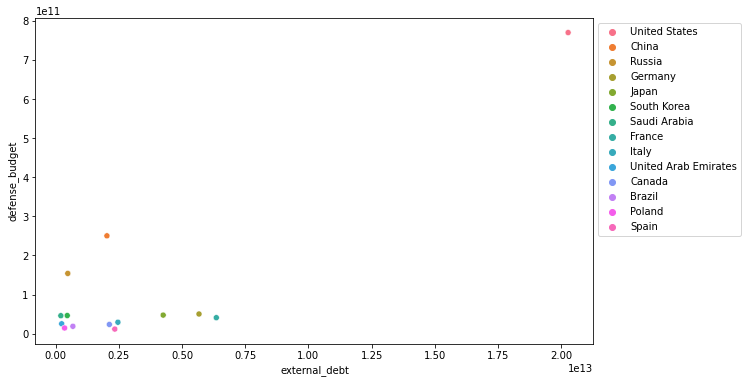

In [20]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='external_debt', y='defense_budget', hue='country',
                data=train.sort_values('defense_budget', ascending=False))
plt.legend(loc = 2, bbox_to_anchor = (1,1))

<AxesSubplot:>

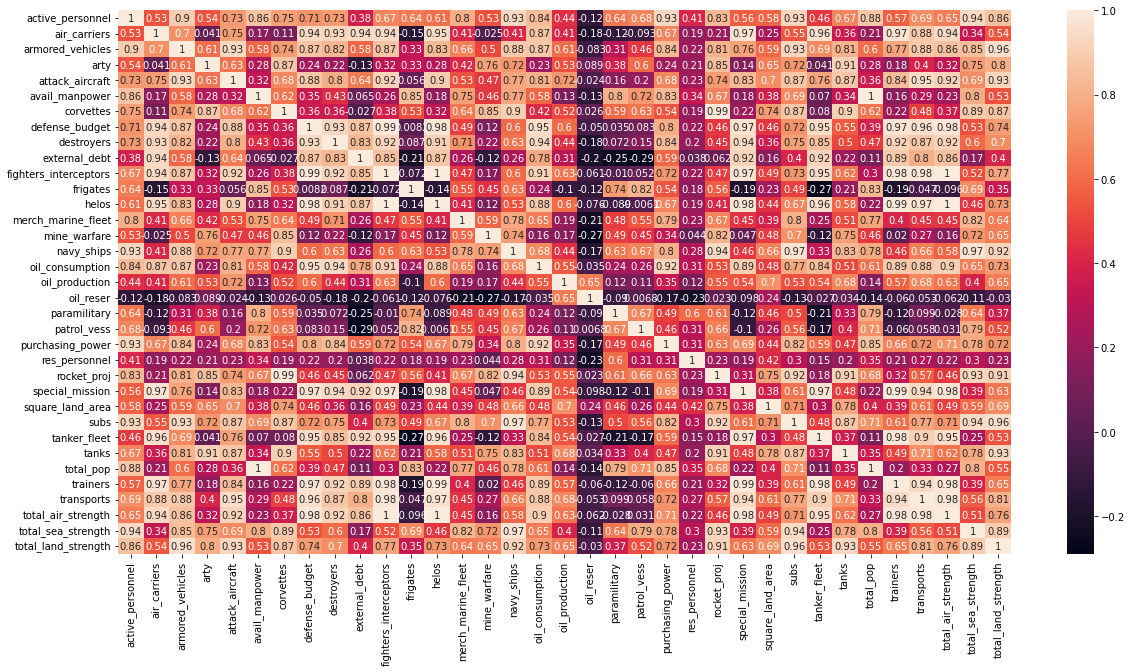

In [21]:
# Correlation of all available features
plt.figure(figsize=(20, 10))
sns.heatmap(train.corr(),annot=True)

In [22]:
# ranks the countries by feature
df1=train.rank(ascending=False,method='min')
df1['country']=train['country']
df1['country_code']=train['country_code']

In [53]:
df1.head()

,country,country_code,active_personnel,air_carriers,armored_vehicles,arty,attack_aircraft,avail_manpower,corvettes,defense_budget,...,square_land_area,subs,tanker_fleet,tanks,total_pop,trainers,transports,total_air_strength,total_sea_strength,total_land_strength
22,Canada,CAN,13.0,10.0,14.0,12.0,14.0,13.0,11.0,11.0,...,2.0,10.0,7.0,14.0,12.0,12.0,14.0,14.0,14.0,14.0
26,China,CHN,1.0,4.0,2.0,3.0,3.0,1.0,2.0,2.0,...,4.0,1.0,9.0,3.0,1.0,4.0,3.0,3.0,1.0,3.0
104,Saudi Arabia,SAR,7.0,10.0,9.0,5.0,8.0,12.0,8.0,7.0,...,6.0,13.0,2.0,5.0,13.0,7.0,7.0,8.0,8.0,5.0
98,Poland,POL,11.0,10.0,12.0,8.0,13.0,11.0,9.0,13.0,...,11.0,12.0,12.0,7.0,11.0,13.0,7.0,13.0,13.0,11.0
58,Japan,JPN,6.0,2.0,10.0,6.0,6.0,5.0,6.0,5.0,...,9.0,5.0,6.0,6.0,5.0,3.0,6.0,5.0,5.0,8.0


In [54]:
# Ranks each feature of train (14) defense budgets
df2=df1.sort_values('defense_budget', ascending=True).head(14)
df2=df2.set_index('country')
df2=df2.T
df2=df2.drop('country_code', axis=0)
df2

country,United States,China,Russia,Germany,Japan,South Korea,Saudi Arabia,France,Italy,United Arab Emirates,Canada,Brazil,Poland,Spain
active_personnel,2.0,1.0,3.0,9.0,6.0,4.0,7.0,8.0,10.0,14.0,13.0,5.0,11.0,11.0
air_carriers,1.0,4.0,7.0,10.0,2.0,5.0,10.0,2.0,5.0,10.0,10.0,7.0,10.0,7.0
armored_vehicles,1.0,2.0,3.0,6.0,10.0,4.0,9.0,8.0,7.0,5.0,14.0,13.0,12.0,11.0
arty,4.0,3.0,1.0,14.0,6.0,2.0,5.0,11.0,13.0,9.0,12.0,7.0,8.0,10.0
attack_aircraft,1.0,3.0,2.0,7.0,6.0,4.0,8.0,10.0,5.0,11.0,14.0,9.0,13.0,12.0
avail_manpower,2.0,1.0,4.0,6.0,5.0,9.0,12.0,7.0,8.0,14.0,13.0,3.0,11.0,10.0
corvettes,3.0,2.0,1.0,7.0,6.0,4.0,8.0,11.0,11.0,5.0,11.0,9.0,9.0,11.0
defense_budget,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
destroyers,1.0,2.0,4.0,8.0,3.0,5.0,8.0,6.0,7.0,8.0,8.0,8.0,8.0,8.0
external_debt,1.0,8.0,10.0,3.0,4.0,11.0,14.0,2.0,5.0,13.0,7.0,9.0,12.0,6.0


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(-5.0, 0, 'trainers'),
  Text(0.0, 0, 'active_personnel'),
  Text(5.0, 0, 'avail_manpower'),
  Text(10.0, 0, 'fighters_interceptors'),
  Text(15.0, 0, 'navy_ships'),
  Text(20.0, 0, 'patrol_vess'),
  Text(25.0, 0, 'square_land_area'),
  Text(30.0, 0, 'trainers'),
  Text(35.0, 0, ''),
  Text(40.0, 0, '')])

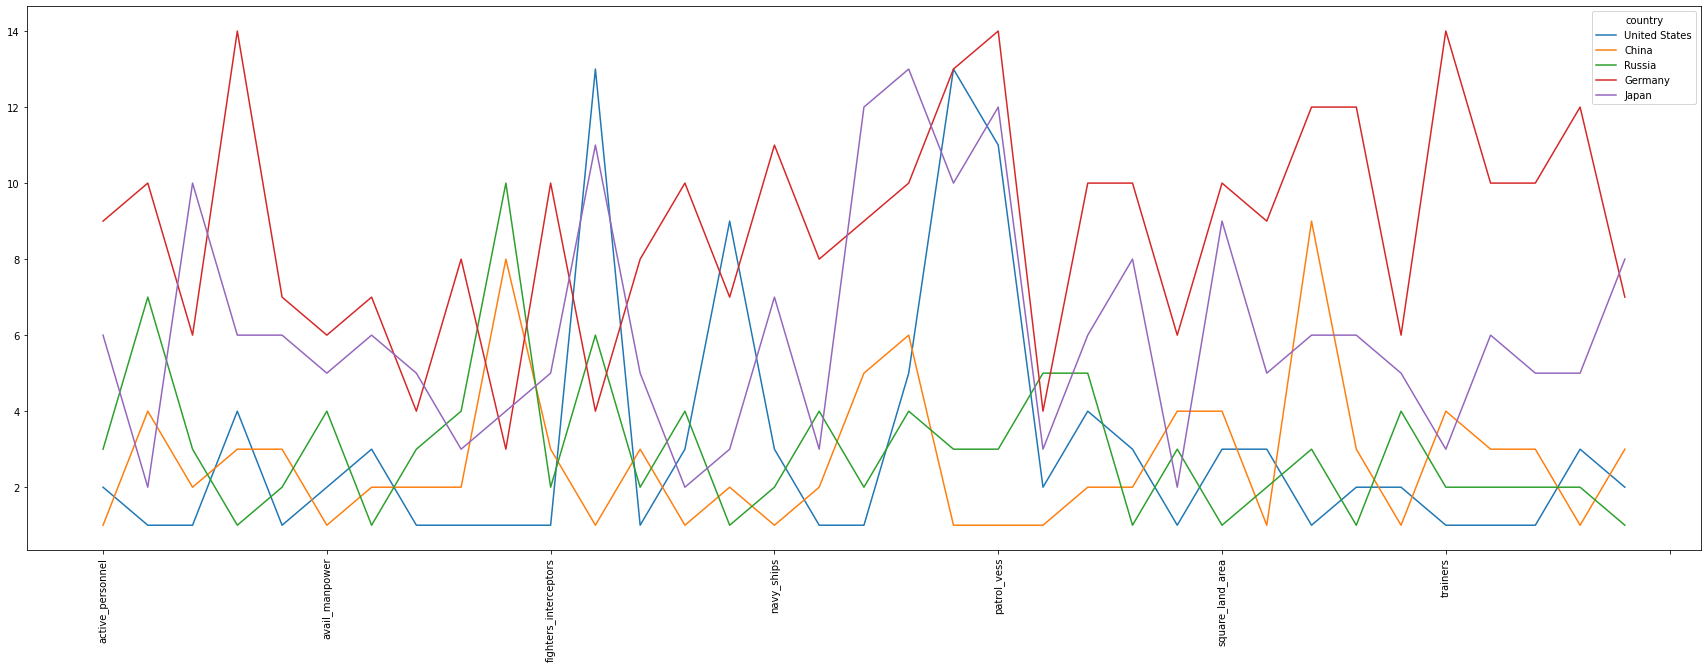

In [60]:
df2.iloc[:,0:5].plot(figsize=(30,10))
plt.xticks(rotation=90)

### Which features is USA ranked at #1?

In [63]:
# takes the number one positions from ranked data frame for USA.
df_usa=pd.DataFrame(df2[df2['United States']==1.0].index)
df_usa.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,air_carriers,armored_vehicles,attack_aircraft,defense_budget,destroyers,external_debt,fighters_interceptors,helos,oil_consumption,oil_production,special_mission,tanker_fleet,trainers,transports,total_air_strength


In [27]:
# lists the features where USA is ranked number 1.
np.array(df_usa[0])

array(['air_carriers', 'armored_vehicles', 'attack_aircraft',
       'defense_budget', 'destroyers', 'external_debt',
       'fighters_interceptors', 'helos', 'oil_consumption',
       'oil_production', 'special_mission', 'tanker_fleet', 'trainers',
       'transports', 'total_air_strength'], dtype=object)

## USA has 15 features where they are ranked No. 1!!! that is 43% of the selected features.

#### What about C-H-I-N-A?

In [28]:
# Lists the features where China is ranked number 1.
df_china=pd.DataFrame(df2[df2['China']==1.0].index)
np.array(df_china.T)

array([['active_personnel', 'avail_manpower', 'frigates',
        'merch_marine_fleet', 'navy_ships', 'paramilitary',
        'patrol_vess', 'purchasing_power', 'subs', 'total_pop',
        'total_sea_strength']], dtype=object)

In [29]:
# Lists the features where Russia is ranked number 1.
df_russia=pd.DataFrame(df2[df2['Russia']==1.0].index)
np.array(df_russia.T)

array([['arty', 'corvettes', 'mine_warfare', 'rocket_proj',
        'square_land_area', 'tanks', 'total_land_strength']], dtype=object)

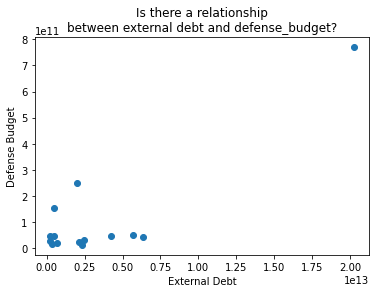

In [30]:
# plot defense budget and external debt
# plt.figure(figsize=(15,6))
plt.scatter(train.external_debt, train.defense_budget)
plt.xlabel("External Debt")
plt.ylabel("Defense Budget")
plt.title("Is there a relationship\nbetween external debt and defense_budget?")
plt.show()

### The higher the budget the more debt.

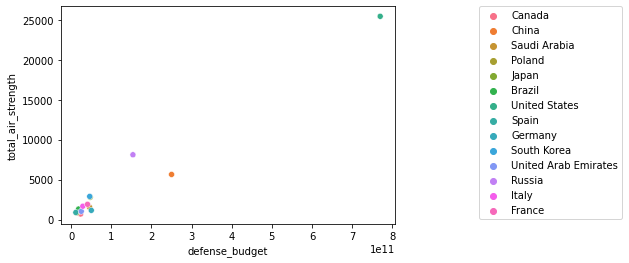

In [64]:
sns.scatterplot(x=train.defense_budget , y=train.total_air_strength, hue=train.country)
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)

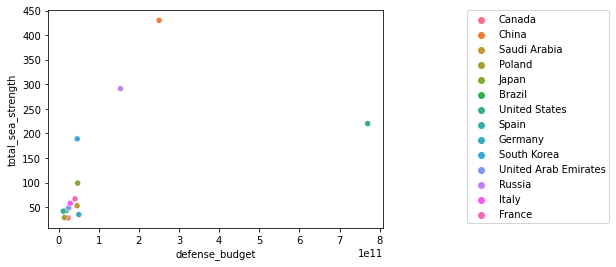

In [65]:
sns.scatterplot(x=train.defense_budget , y=train.total_sea_strength, hue=train.country)
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)

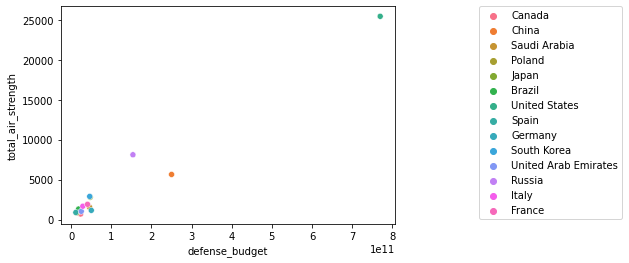

In [66]:
sns.scatterplot(x=train.defense_budget , y=train.total_air_strength, hue=train.country)
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)

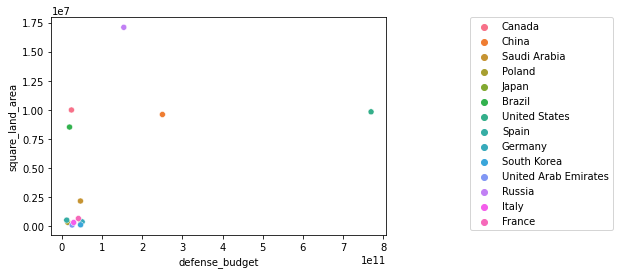

In [67]:
sns.scatterplot(x=train.defense_budget , y=train.square_land_area, hue=train.country)
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)

## Preprocessing

In [35]:
train_scaled, validate_scaled, test_scaled = prepare.scale_data(train, validate, test)

In [36]:
# removes country and country code

train_scaled

,active_personnel,air_carriers,armored_vehicles,arty,attack_aircraft,avail_manpower,corvettes,defense_budget,destroyers,external_debt,...,square_land_area,subs,tanker_fleet,tanks,total_pop,trainers,transports,total_air_strength,total_sea_strength,total_land_strength
22,-0.720506,-0.543746,-0.870179,-0.613044,-0.660690,-0.423253,-0.588751,-0.441740,-0.599111,-0.256408,...,1.064035,-0.627702,-0.285249,-0.643377,-0.436506,-0.420436,-0.526671,-0.525668,-0.755848,-0.836658
26,2.772151,0.057236,1.681452,0.862105,0.637927,3.529076,2.070124,0.727913,1.038458,-0.275550,...,0.991780,2.095798,-0.304028,0.869890,3.498032,-0.004799,0.462781,0.262806,2.671963,1.550341
104,-0.440008,-0.543746,-0.514265,-0.001315,-0.431639,-0.413771,-0.436815,-0.325907,-0.599111,-0.635518,...,-0.396112,-0.772955,-0.185099,-0.356418,-0.445647,-0.331371,-0.475220,-0.390701,-0.542676,-0.420284
98,-0.630023,-0.543746,-0.622228,-0.497437,-0.600938,-0.410434,-0.512783,-0.488438,-0.599111,-0.606554,...,-0.738461,-0.736642,-0.322806,-0.414689,-0.435804,-0.478250,-0.475220,-0.502431,-0.747321,-0.601602
58,-0.412863,0.257564,-0.567789,-0.475405,-0.377862,-0.223643,-0.360847,-0.318257,0.838755,0.164093,...,-0.726305,-0.010375,-0.278990,-0.373402,-0.185543,0.035827,-0.435642,-0.190957,-0.150439,-0.559276
17,-0.195703,-0.343418,-0.837851,-0.478515,-0.483425,0.071981,-0.512783,-0.466329,-0.599111,-0.541473,...,0.790120,-0.518762,-0.310287,-0.538842,0.071246,-0.300120,-0.174426,-0.425716,-0.627945,-0.767388
132,1.668254,3.462801,2.458622,0.080077,2.711332,0.278238,0.246895,3.409727,3.075434,3.327976,...,1.034590,1.696351,3.601832,1.268704,0.422916,3.529676,3.217416,3.413519,0.881315,1.889352
114,-0.630023,-0.343418,-0.603396,-0.594122,-0.590979,-0.394225,-0.588751,-0.502627,-0.599111,-0.214155,...,-0.702552,-0.700328,-0.322806,-0.571637,-0.409550,-0.365747,-0.475220,-0.495110,-0.636472,-0.644783
44,-0.514204,-0.543746,-0.284385,-0.623930,-0.401763,-0.313869,-0.398831,-0.303720,-0.599111,0.443953,...,-0.730199,-0.555075,-0.322806,-0.589499,-0.315109,-0.570440,-0.498967,-0.452774,-0.696160,-0.441397
112,0.157182,-0.143091,0.079535,1.131680,-0.258358,-0.372189,-0.170928,-0.324256,-0.119822,-0.585627,...,-0.778150,0.025938,-0.297768,0.100958,-0.396662,-0.176679,-0.506882,-0.175041,0.616982,0.284480


In [37]:
# Standardize data using PCA (principal component analysis)
pca = PCA()
pca.fit(train_scaled)

PCA()

In [38]:
# shows how much variance is explained by each of the 14 individual components
pca.explained_variance_ratio_

array([5.71291444e-01, 2.20091079e-01, 8.75407545e-02, 4.47102621e-02,
       3.40479374e-02, 1.73038755e-02, 1.15362751e-02, 5.89626273e-03,
       3.46480795e-03, 1.86736439e-03, 1.33634683e-03, 7.51433718e-04,
       1.62156046e-04, 2.82512788e-33])

Text(0, 0.5, 'Cumulative Explained Variance')

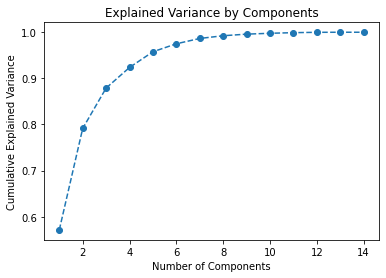

In [39]:
#plt.figure(figsize = (10,8))
plt.plot(range(1,15), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

### The graph shows the amount of variance captured (on the y-axis) depending on the number of components we include (the x-axis). A rule of thumb is to preserve around 80 % of the variance. So, in this instance, we decide to keep 3 components.

In [40]:
# we choose three components which is above 80%
pca = PCA(n_components = 3)

In [41]:
# fit the model to our data with the selected number of compenents = 3
pca.fit(train_scaled)

PCA(n_components=3)

In [42]:
# will only need the caluculated resulting components scores for the lements in our data set.
pca.transform(train_scaled)

array([[-2.92676905,  0.62723096,  0.73152042],
       [ 7.73264862, -6.63521674, -3.02985538],
       [-2.29229079,  0.3519466 ,  1.67125441],
       [-3.14393528,  0.38816039,  0.15052011],
       [-0.94719555,  0.7494666 , -1.05179722],
       [-1.81983106, -0.5045965 , -0.86310338],
       [11.26359612,  6.99460135, -0.52813253],
       [-2.97390517,  0.38578015, -0.5494661 ],
       [-2.56574137,  0.65581023, -0.57386393],
       [-0.46785268, -1.30445477, -0.14253044],
       [-2.9987284 ,  0.62763115,  0.53360928],
       [ 5.5571516 , -3.21123762,  5.12025171],
       [-2.40927378,  0.29492807, -0.69846937],
       [-2.00787322,  0.57995014, -0.76993758]])

In [43]:
train_model = pca.transform(train_scaled)

## Now we will incorporate newly obtained PCA scores in the kmeans algorithm.

In [44]:
# within cluster sum of squares = wcss. Fit K Means using the transformed data from the PCA.
wcss = []
for i in range(1,15):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(train_model)
    wcss.append(kmeans_pca.inertia_)

## Now plot the WCSS against the number of components on a graph.

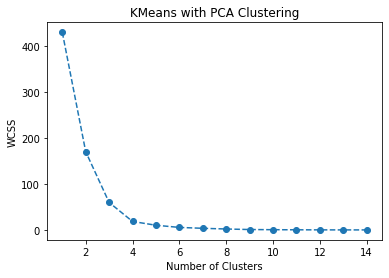

In [45]:
#plt.figure(figsize = (10,8))
plt.plot(range(1, 15), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title("KMeans with PCA Clustering")
plt.show()

### From the graph we determine the number of clusters to keep using elbow method = 4 clusters

## Modeling

In [46]:
# four clusters chosen, so we run Kmeans with the number of clusters equal to four
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
# fit data with the kmeans pca model
kmeans_pca.fit(train_model)
cluster = kmeans_pca.predict(train_model)

In [47]:
# Create new data frame with original features and add the PCA scores and assigned clusters.

df_pca_kmeans = pd.concat([train_scaled.reset_index(drop = True), pd.DataFrame(train_model)], axis = 1)
df_pca_kmeans.columns.values[-3:] = ['component_1','component_2','component_3']
df_pca_kmeans['KMeans_PCA'] = kmeans_pca.labels_

In [48]:
df_pca_kmeans.head()

,active_personnel,air_carriers,armored_vehicles,arty,attack_aircraft,avail_manpower,corvettes,defense_budget,destroyers,external_debt,...,total_pop,trainers,transports,total_air_strength,total_sea_strength,total_land_strength,component_1,component_2,component_3,KMeans_PCA
0,-0.720506,-0.543746,-0.870179,-0.613044,-0.660690,-0.423253,-0.588751,-0.441740,-0.599111,-0.256408,...,-0.436506,-0.420436,-0.526671,-0.525668,-0.755848,-0.836658,-2.926769,0.627231,0.731520,1
1,2.772151,0.057236,1.681452,0.862105,0.637927,3.529076,2.070124,0.727913,1.038458,-0.275550,...,3.498032,-0.004799,0.462781,0.262806,2.671963,1.550341,7.732649,-6.635217,-3.029855,2
2,-0.440008,-0.543746,-0.514265,-0.001315,-0.431639,-0.413771,-0.436815,-0.325907,-0.599111,-0.635518,...,-0.445647,-0.331371,-0.475220,-0.390701,-0.542676,-0.420284,-2.292291,0.351947,1.671254,1
3,-0.630023,-0.543746,-0.622228,-0.497437,-0.600938,-0.410434,-0.512783,-0.488438,-0.599111,-0.606554,...,-0.435804,-0.478250,-0.475220,-0.502431,-0.747321,-0.601602,-3.143935,0.388160,0.150520,1
4,-0.412863,0.257564,-0.567789,-0.475405,-0.377862,-0.223643,-0.360847,-0.318257,0.838755,0.164093,...,-0.185543,0.035827,-0.435642,-0.190957,-0.150439,-0.559276,-0.947196,0.749467,-1.051797,1


In [49]:
# create new column named Clusters and map the four clusters directly inside it.
df_pca_kmeans['clusters'] = df_pca_kmeans['KMeans_PCA'].map({0:'1', 1:'2', 2:'3', 3:'4'})

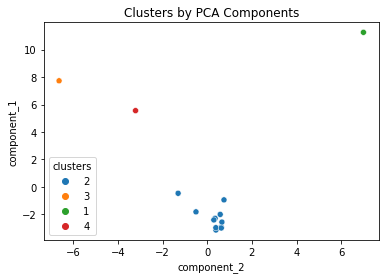

In [50]:
# Plots data by PCA Components.
x_axis = df_pca_kmeans['component_2']
y_axis = df_pca_kmeans['component_1']
sns.scatterplot(x_axis, y_axis, hue = df_pca_kmeans['clusters'])
plt.title('Clusters by PCA Components')
plt.show()

In [51]:
# creates a new data frame with components only

pca = PCA(n_components=3)
pca_fit = pca.fit_transform(train_model)

train_pca = pd.DataFrame(data=pca_fit, columns=['component_1', 'component_2','component_3'])
train_pca['cluster'] = kmeans_pca.predict(train_model)
train_pca.head()

,component_1,component_2,component_3,cluster
0,-2.926769,0.627231,0.731520,1
1,7.732649,-6.635217,-3.029855,2
2,-2.292291,0.351947,1.671254,1
3,-3.143935,0.388160,0.150520,1
4,-0.947196,0.749467,-1.051797,1
